In [2]:
import os
import json
import numpy as np
import pandas as pd

In [ ]:
%run evaluate_models.py --result_type bar_plot

Text(0, 0.5, 'BLEU score')

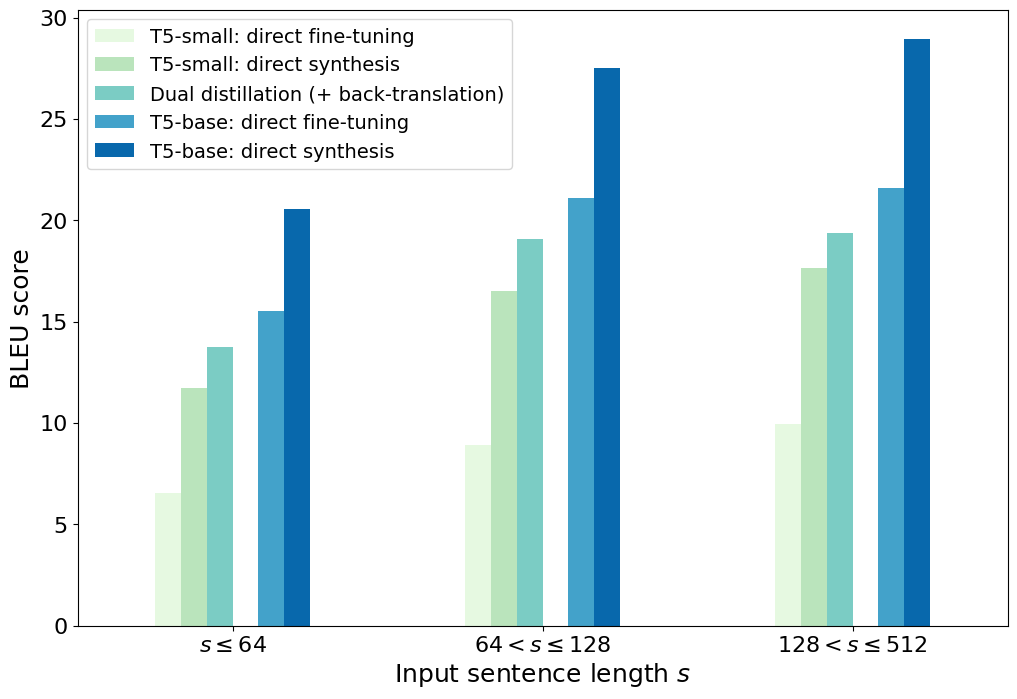

In [5]:
RESULTS_DIR = "eval_results/"
d = {}
filenames = ['t5-small-finetuned-en-to-it-it', 't5-small-finetuned-en-to-it-lrs-back-it', '2teachersdistillbacktranslation-en-it-it', 't5-base-finetuned-en-to-it-it', 't5-base-finetuned-en-to-it-lrs-back-it']
model_names = ['T5-small: direct fine-tuning', 'T5-small: direct synthesis', 'Dual distillation (+ back-translation)', 'T5-base: direct fine-tuning', 'T5-base: direct synthesis']

for i, filename in enumerate(filenames):
    if i ==3:
        d[''] = [0, 0, 0]
    model_name = model_names[i]
    zarray = np.zeros(len(os.listdir(RESULTS_DIR + filename)))
    idx_dict = {"64": 0, "128": 1, "512": 2}
    for jsfile in os.listdir(RESULTS_DIR + filename):
        bucket_size = jsfile.split('-')[1].split('.')[0]
        idx = idx_dict[bucket_size]
        f = open(RESULTS_DIR + filename + '/' + jsfile)
        data = json.load(f)
        zarray[idx] = data['eval_bleu']
        f.close
    d[model_name] = zarray.tolist()


d_df = pd.DataFrame(d)
d_df.index = [r'$s \leq 64$', r"$64 < s \leq 128$", r"$128 < s \leq 512$"]
color_list = ['#e6f9e1', '#bae4bc', '#7bccc4', '#ffffff', '#43a2ca', '#0868ac']
ax = d_df.plot.bar(rot=0, figsize=(12, 8), color=color_list)
ax.tick_params(axis='both', labelsize=16)
ax.legend(fontsize=14)
ax.set_xlabel(r"Input sentence length $s$",  fontsize=18)
ax.set_ylabel("BLEU score",  fontsize=18)
